In [130]:
%matplotlib notebook

In [131]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import json
from config import api_key
from citipy import citipy
top_hits_csv=pd.read_csv('./Resources/top_hits.csv')
top_hits_csv.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


In [132]:
top_hits_csv.count()

Rank      5100
Song      5100
Artist    5100
Year      5100
Lyrics    4913
Source    4913
dtype: int64

In [133]:
top_hits_sorted = top_hits_csv.dropna(how="any")
top_hits_sorted.count()

Rank      4913
Song      4913
Artist    4913
Year      4913
Lyrics    4913
Source    4913
dtype: int64

In [134]:
top_hits_cleaned = top_hits_sorted[top_hits_sorted["Lyrics"].map(len) > 80]
top_hits_cleaned.count()

Rank      4829
Song      4829
Artist    4829
Year      4829
Lyrics    4829
Source    4829
dtype: int64

In [136]:
top_hits_cleaned.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0


In [138]:
Top_hits_new = pd.DataFrame(top_hits_cleaned[["Artist","Song","Lyrics","Year"]])
#Top_song = pd.DataFrame(top_hits_cleaned["Song"])
Top_hits_new.head()

,Artist,Song,Lyrics,Year
0,sam the sham and the pharaohs,wooly bully,sam the sham miscellaneous wooly bully wooly b...,1965
1,four tops,i cant help myself sugar pie honey bunch,sugar pie honey bunch you know that i love yo...,1965
3,we five,you were on my mind,when i woke up this morning you were on my mi...,1965
4,the righteous brothers,youve lost that lovin feelin,you never close your eyes anymore when i kiss...,1965
5,petula clark,downtown,when youre alone and life is making you lonel...,1965


In [140]:
# creating new set of DataFrame
Top_hits_new['Listeners'] = ""
Top_hits_new['Artist Name'] = ""
Top_hits_new['Genre'] = ""
Top_hits_new["Playcounts"] = ""

track_search = ""
artist_search = ""
#url1 = 'http://ws.audioscrobbler.com/2.0/?method=track.search&track='
#url2 = 'http://ws.audioscrobbler.com/2.0/?method=geo.gettopartists&country='
#url3 = 'http://ws.audioscrobbler.com/2.0/?method=album.search&album='
#url4 = 'http://ws.audioscrobbler.com/2.0/?method=artist.search&artist='
# polulating the new DataFrame using Api call and excepting possible errors
url5 = 'http://ws.audioscrobbler.com/2.0/?method=track.getInfo'
#target_url = url1 + track_search + '&api_key=' + api_key +'&format=json'
for index, row in Top_hits_new.iterrows():
    artist_search = row['Artist']
    track_search = row['Song']
    response = requests.get(url5 + '&api_key=' +api_key +'&artist='+ artist_search + '&track=' + track_search + '&format=json')
    #response = requests.get(url1 + track_search + '&api_key=' + api_key +'&format=json')
    data= json.loads(response.text)
    #data = json.dumps(res,indent=2)
    try:
        print(f"... Processing {artist_search} song : {track_search}  ...")
        print("............................................")
        Top_hits_new.loc[index, 'Listeners'] = data["track"]['listeners']
        Top_hits_new.loc[index, 'Artist Name'] = data["track"]['artist']['name']
        Top_hits_new.loc[index, 'Genre'] = data["track"]["toptags"]["tag"][0]["name"]
        Top_hits_new.loc[index, 'Playcounts'] = data["track"]["playcount"]
        
        
    except:
        print("Missing result... continuing.")
print("Api calling on the tracks and artists completed")

... Processing sam the sham and the pharaohs song : wooly bully  ...
............................................
... Processing four tops song : i cant help myself sugar pie honey bunch  ...
............................................
... Processing we five song : you were on my mind  ...
............................................
... Processing the righteous brothers song : youve lost that lovin feelin  ...
............................................
Missing result... continuing.
... Processing petula clark song : downtown  ...
............................................
... Processing the beatles song : help  ...
............................................
... Processing hermans hermits song : cant you hear my heart beat  ...
............................................
... Processing elvis presley song : crying in the chapel  ...
............................................
... Processing the temptations song : my girl  ...
............................................
... Pro

... Processing brenda lee song : too many rivers  ...
............................................
... Processing the dave clark five song : i like it like that  ...
............................................
... Processing bobby goldsboro song : little things  ...
............................................
... Processing peter and gordon song : true love ways  ...
............................................
... Processing four tops song : its the same old song  ...
............................................
... Processing joe tex song : hold what youve got  ...
............................................
Missing result... continuing.
... Processing the animals song : we gotta get out of this place  ...
............................................
... Processing the beau brummels song : laugh laugh  ...
............................................
... Processing the rolling stones song : the last time  ...
............................................
... Processing the lovin sp

... Processing stevie wonder song : uptight everythings alright  ...
............................................
Missing result... continuing.
... Processing cher song : bang bang my baby shot me down  ...
............................................
Missing result... continuing.
... Processing the beach boys song : sloop john b  ...
............................................
... Processing the rolling stones song : 19th nervous breakdown  ...
............................................
... Processing count five song : psychotic reaction  ...
............................................
... Processing the temptations song : beauty is only skin deep  ...
............................................
... Processing paul revere  the raiders song : just like me  ...
............................................
Missing result... continuing.
... Processing deon jackson song : love makes the world go round  ...
............................................
... Processing crispian st peters 

... Processing the hollies song : on a carousel  ...
............................................
... Processing bobby vinton song : please love me forever  ...
............................................
... Processing dionne warwick song : alfie  ...
............................................
... Processing the tremeloes song : silence is golden  ...
............................................
... Processing ed ames song : my cup runneth over  ...
............................................
... Processing the 5th dimension song : up up and away  ...
............................................
... Processing scott mckenzie song : san francisco be sure to wear flowers in your hair  ...
............................................
Missing result... continuing.
... Processing the cowsills song : the rain the park  other things  ...
............................................
Missing result... continuing.
... Processing hermans hermits song : theres a kind of hush  ...
............

... Processing the vogues song : turn around look at me  ...
............................................
... Processing john fred  his playboy band song : judy in disguise with glasses  ...
............................................
Missing result... continuing.
... Processing classics iv song : spooky  ...
............................................
... Processing the supremes song : love child  ...
............................................
... Processing merrilee rush song : angel of the morning  ...
............................................
... Processing georgie fame song : the ballad of bonnie and clyde  ...
............................................
... Processing mary hopkin song : those were the days  ...
............................................
... Processing steppenwolf song : born to be wild  ...
............................................
... Processing the intruders song : cowboys to girls  ...
............................................
... Processing 19

... Processing tom jones song : ill never fall in love again  ...
............................................
Missing result... continuing.
... Processing the foundations song : build me up buttercup  ...
............................................
... Processing tommy james and the shondells song : crimson and clover  ...
............................................
... Processing three dog night song : one  ...
............................................
... Processing tommy james and the shondells song : crystal blue persuasion  ...
............................................
... Processing the cowsills song : hair  ...
............................................
... Processing marvin gaye song : too busy thinking about my baby  ...
............................................
... Processing henry mancini song : love theme from romeo and juliet  ...
............................................
... Processing the youngbloods song : get together  ...
.............................

... Processing edwin hawkins singers song : oh happy day  ...
............................................
... Processing tom jones song : love me tonight  ...
............................................
... Processing paul revere  the raiders song : mr sun mr moon  ...
............................................
Missing result... continuing.
... Processing the guess who song : laughing  ...
............................................
... Processing david ruffin song : my whole world ended the moment you left me  ...
............................................
Missing result... continuing.
... Processing the box tops song : soul deep  ...
............................................
... Processing bj thomas song : hooked on a feeling  ...
............................................
... Processing the box tops song : sweet cream ladies  ...
............................................
... Processing simon  garfunkel song : bridge over troubled water  ...
...........................

... Processing the delfonics song : didnt i blow your mind this time  ...
............................................
... Processing elvis presley song : the wonder of you  ...
............................................
... Processing creedence clearwater revival song : up around the bend  ...
............................................
... Processing ronnie dyson song : if you let me make love to you then why cant i touch you  ...
............................................
Missing result... continuing.
... Processing bj thomas song : i just cant help believing  ...
............................................
... Processing the spinners song : its a shame  ...
............................................
... Processing bobbi martin song : for the love of him  ...
............................................
... Processing mountain song : mississippi queen  ...
............................................
... Processing ike  tina turner song : i want to take you higher  ...
.....

... Processing tommy james song : draggin the line  ...
............................................
Missing result... continuing.
... Processing ike  tina turner song : proud mary  ...
............................................
... Processing the bells song : stay awhile  ...
............................................
... Processing the stampeders song : sweet city woman  ...
............................................
... Processing lobo song : me and you and a dog named boo  ...
............................................
... Processing bread song : if  ...
............................................
... Processing marvin gaye song : mercy mercy me the ecology  ...
............................................
Missing result... continuing.
... Processing brewer  shipley song : one toke over the line  ...
............................................
Missing result... continuing.
... Processing freda payne song : bring the boys home  ...
.........................................

... Processing elton john song : rocket man  ...
............................................
... Processing michael jackson song : rockin robin  ...
............................................
... Processing daniel boone song : beautiful sunday  ...
............................................
... Processing cat stevens song : morning has broken  ...
............................................
... Processing arlo guthrie song : city of new orleans  ...
............................................
... Processing ricky nelson song : garden party  ...
............................................
... Processing johnny nash song : i can see clearly now  ...
............................................
... Processing elvis presley song : burning love  ...
............................................
... Processing betty wright song : clean up woman  ...
............................................
... Processing argent song : hold your head up  ...
........................................

... Processing john denver song : rocky mountain high  ...
............................................
... Processing stealers wheel song : stuck in the middle with you  ...
............................................
... Processing three dog night song : shambala  ...
............................................
... Processing the ojays song : love train  ...
............................................
... Processing barry white song : im gonna love you just a little more baby  ...
............................................
Missing result... continuing.
... Processing tony orlando and dawn song : say has anybody seen my sweet gypsy rose  ...
............................................
... Processing king harvest song : dancing in the moonlight  ...
............................................
... Processing anne murray song : dannys song  ...
............................................
... Processing bobby boris pickett and the cryptkickers song : monster mash  ...
............

... Processing ray stevens song : the streak  ...
............................................
... Processing elton john song : bennie and the jets  ...
............................................
... Processing mac davis song : one hell of a woman  ...
............................................
... Processing kool  the gang song : jungle boogie  ...
............................................
... Processing maria muldaur song : midnight at the oasis  ...
............................................
... Processing the stylistics song : you make me feel brand new  ...
............................................
... Processing al wilson song : show and tell  ...
............................................
... Processing jim stafford song : spiders and snakes  ...
............................................
... Processing david essex song : rock on  ...
............................................
... Processing john denver song : sunshine on my shoulders  ...
.....................

... Processing diana ross  marvin gaye song : my mistake was to love you  ...
............................................
Missing result... continuing.
... Processing jim stafford song : wildwood weed  ...
............................................
... Processing the first class song : beach baby  ...
............................................
... Processing war song : me and baby brother  ...
............................................
... Processing the stylistics song : rockin roll baby  ...
............................................
Missing result... continuing.
... Processing olivia newtonjohn song : i honestly love you  ...
............................................
... Processing chicago song : call on me  ...
............................................
... Processing fancy song : wild thing  ...
............................................
... Processing the spinners song : mighty love  ...
............................................
... Processing captain  tennille

... Processing grand funk railroad song : some kind of wonderful  ...
............................................
... Processing the three degrees song : when will i see you again  ...
............................................
... Processing joe simon song : get down get down get on the floor  ...
............................................
Missing result... continuing.
... Processing john denver song : im sorry  ...
............................................
... Processing queen song : killer queen  ...
............................................
... Processing eddie kendricks song : shoeshine boy  ...
............................................
... Processing bt express song : do it til youre satisfied  ...
............................................
Missing result... continuing.
... Processing electric light orchestra song : cant get it out of my head  ...
............................................
... Processing al green song : shalala make me happy  ...
...............

... Processing earth wind  fire song : sing a song  ...
............................................
Missing result... continuing.
... Processing tavares song : heaven must be missing an angel  ...
............................................
... Processing the brothers johnson song : ill be good to you  ...
............................................
... Processing the beach boys song : rock and roll music  ...
............................................
... Processing captain  tennille song : shop around  ...
............................................
Missing result... continuing.
... Processing bay city rollers song : saturday night  ...
............................................
... Processing elton john song : island girl  ...
............................................
... Processing the staple singers song : lets do it again  ...
............................................
... Processing wings song : let em in  ...
............................................
... Process

... Processing fleetwood mac song : dreams  ...
............................................
... Processing the jacksons song : enjoy yourself  ...
............................................
... Processing brick song : dazz  ...
............................................
... Processing peter frampton song : im in you  ...
............................................
... Processing kenny rogers song : lucille  ...
............................................
... Processing 10cc song : the things we do for love  ...
............................................
... Processing shaun cassidy song : da doo ron ron  ...
............................................
... Processing james taylor song : handy man  ...
............................................
... Processing crosby stills  nash song : just a song before i go  ...
............................................
... Processing alice cooper song : you and me  ...
............................................
... Processing andrew g

... Processing peter brown song : dance with me  ...
............................................
... Processing meat loaf song : two out of three aint bad  ...
............................................
... Processing raydio song : jack and jill  ...
............................................
... Processing abba song : take a chance on me  ...
............................................
... Processing dan hill song : sometimes when we touch  ...
............................................
... Processing donna summer song : last dance  ...
............................................
... Processing olivia newtonjohn song : hopelessly devoted to you  ...
............................................
... Processing foreigner song : hot blooded  ...
............................................
... Processing rod stewart song : youre in my heart the final acclaim  ...
............................................
Missing result... continuing.
... Processing roberta flack  donny hathawa

... Processing robert john song : sad eyes  ...
............................................
... Processing bee gees song : too much heaven  ...
............................................
... Processing donna summer song : macarthur park  ...
............................................
... Processing dr hook song : when youre in love with a beautiful woman  ...
............................................
... Processing david naughton song : makin it  ...
............................................
... Processing the pointer sisters song : fire  ...
............................................
... Processing bee gees song : tragedy  ...
............................................
... Processing olivia newtonjohn song : a little more love  ...
............................................
... Processing blondie song : heart of glass  ...
............................................
... Processing the doobie brothers song : what a fool believes  ...
..................................

... Processing van halen song : dance the night away  ...
............................................
... Processing nigel olsson song : dancin shoes  ...
............................................
... Processing diana ross song : the boss  ...
............................................
... Processing commodores song : sail on  ...
............................................
... Processing gq song : i do love you  ...
............................................
... Processing firefall song : strange way  ...
............................................
... Processing blondie song : call me  ...
............................................
... Processing pink floyd song : another brick in the wall part ii  ...
............................................
... Processing olivia newtonjohn song : magic  ...
............................................
... Processing michael jackson song : rock with you  ...
............................................
... Processing captain  tennill

... Processing peaches  herb song : i pledge my love  ...
............................................
Missing result... continuing.
... Processing eagles song : the long run  ...
............................................
... Processing mickey gilley song : stand by me  ...
............................................
... Processing pat benatar song : heartbreaker  ...
............................................
... Processing dionne warwick song : dej`a vu  ...
............................................
Missing result... continuing.
... Processing eddie rabbitt song : drivin my life away  ...
............................................
... Processing supertramp song : take the long way home  ...
............................................
... Processing fleetwood mac song : sara  ...
............................................
... Processing hall  oates song : wait for me  ...
............................................
Missing result... continuing.
... Processing boz scaggs

... Processing neil diamond song : america  ...
............................................
... Processing john cougar song : aint even done with the night  ...
............................................
... Processing christopher cross song : arthurs theme best that you can do  ...
............................................
Missing result... continuing.
... Processing queen song : another one bites the dust  ...
............................................
... Processing the alan parsons project song : games people play  ...
............................................
... Processing eric clapton song : i cant stand it  ...
............................................
... Processing steve winwood song : while you see a chance  ...
............................................
... Processing stevie wonder song : master blaster jammin  ...
............................................
Missing result... continuing.
... Processing the police song : dont stand so close to me  ...
......

... Processing juice newton song : loves been a little bit hard on me  ...
............................................
... Processing rod stewart song : young turks  ...
............................................
... Processing reo speedwagon song : keep the fire burnin  ...
............................................
... Processing huey lewis and the news song : do you believe in love  ...
............................................
... Processing paul davis song : cool night  ...
............................................
... Processing 38 special song : caught up in you  ...
............................................
... Processing diana ross song : why do fools fall in love  ...
............................................
... Processing alabama song : love in the first degree  ...
............................................
... Processing crosby stills  nash song : wasted on the way  ...
............................................
Missing result... continuing.
... Proce

... Processing lionel richie song : you are  ...
............................................
... Processing after the fire song : der kommissar  ...
............................................
... Processing taco song : puttin on the ritz  ...
............................................
... Processing marvin gaye song : sexual healing  ...
............................................
... Processing the human league song : keep feeling fascination  ...
............................................
... Processing culture club song : time clock of the heart  ...
............................................
Missing result... continuing.
... Processing men without hats song : the safety dance  ...
............................................
... Processing toni basil song : mickey  ...
............................................
... Processing phil collins song : you cant hurry love  ...
............................................
... Processing journey song : separate ways worlds apart

... Processing culture club song : karma chameleon  ...
............................................
... Processing john waite song : missing you  ...
............................................
... Processing lionel richie song : all night long all night  ...
............................................
Missing result... continuing.
... Processing deniece williams song : lets hear it for the boy  ...
............................................
... Processing bruce springsteen song : dancing in the dark  ...
............................................
... Processing cyndi lauper song : girls just want to have fun  ...
............................................
... Processing duran duran song : the reflex  ...
............................................
... Processing cyndi lauper song : time after time  ...
............................................
... Processing pointer sisters song : jump for my love  ...
............................................
... Processing the romant

... Processing christine mcvie song : got a hold on me  ...
............................................
... Processing shalamar song : dancing in the sheets  ...
............................................
... Processing the rolling stones song : undercover of the night  ...
............................................
... Processing john cafferty  the beaver brown band song : on the dark side  ...
............................................
Missing result... continuing.
... Processing duran duran song : new moon on monday  ...
............................................
... Processing peter schilling song : major tom coming home  ...
............................................
... Processing the cars song : magic  ...
............................................
... Processing night ranger song : when you close your eyes  ...
............................................
... Processing billy squier song : rock me tonite  ...
............................................
... Process

... Processing bryan adams song : summer of 69  ...
............................................
... Processing katrina and the waves song : walking on sunshine  ...
............................................
... Processing wham song : freedom  ...
............................................
... Processing julian lennon song : too late for goodbyes  ...
............................................
... Processing julian lennon song : valotte  ...
............................................
... Processing power station song : some like it hot  ...
............................................
... Processing ashford  simpson song : solid  ...
............................................
Missing result... continuing.
... Processing madonna song : angel  ...
............................................
... Processing bruce springsteen song : im on fire  ...
............................................
... Processing daryl hall  john oates song : method of modern love  ...
...............

... Processing eddie money song : take me home tonight  ...
............................................
... Processing jermaine stewart song : we dont have to take our clothes off  ...
............................................
... Processing lisa lisa and cult jam song : all cried out  ...
............................................
... Processing the outfield song : your love  ...
............................................
... Processing wham song : im your man  ...
............................................
... Processing scritti politti song : perfect way  ...
............................................
... Processing james brown song : living in america  ...
............................................
... Processing john cougar mellencamp song : rock in the usa  ...
............................................
Missing result... continuing.
... Processing el debarge song : whos johnny  ...
............................................
Missing result... continuing.
... Proc

... Processing huey lewis and the news song : jacobs ladder  ...
............................................
... Processing madonna song : whos that girl  ...
............................................
... Processing the jets song : you got it all  ...
............................................
... Processing samantha fox song : touch me i want your body  ...
............................................
Missing result... continuing.
... Processing michael jackson with siedah garrett song : i just cant stop loving you  ...
............................................
Missing result... continuing.
... Processing madonna song : causing a commotion  ...
............................................
... Processing genesis song : in too deep  ...
............................................
... Processing janet jackson song : lets wait awhile  ...
............................................
... Processing huey lewis and the news song : hip to be square  ...
.............................

... Processing debbie gibson song : shake your love  ...
............................................
... Processing robert palmer song : simply irresistible  ...
............................................
... Processing richard marx song : hold on to the nights  ...
............................................
... Processing eric carmen song : hungry eyes  ...
............................................
... Processing johnny hates jazz song : shattered dreams  ...
............................................
... Processing george michael song : father figure  ...
............................................
... Processing samantha fox song : naughty girls need love too  ...
............................................
... Processing phil collins song : a groovy kind of love  ...
............................................
... Processing def leppard song : love bites  ...
............................................
... Processing richard marx song : endless summer nights  ...
....

... Processing paula abdul song : straight up  ...
............................................
... Processing janet jackson song : miss you much  ...
............................................
... Processing paula abdul song : cold hearted  ...
............................................
... Processing bette midler song : wind beneath my wings  ...
............................................
... Processing milli vanilli song : girl you know its true  ...
............................................
... Processing will to power song : baby i love your wayfreebird medley  ...
............................................
Missing result... continuing.
... Processing anita baker song : giving you the best that i got  ...
............................................
... Processing richard marx song : right here waiting  ...
............................................
... Processing boy meets girl song : waiting for a star to fall  ...
............................................
... Pr

... Processing guns n roses song : paradise city  ...
............................................
... Processing samantha fox song : i wanna have some fun  ...
............................................
... Processing rick astley song : she wants to dance with me  ...
............................................
... Processing vanessa williams song : dreamin  ...
............................................
... Processing babyface song : its no crime  ...
............................................
... Processing alice cooper song : poison  ...
............................................
... Processing donna summer song : this time i know its for real  ...
............................................
... Processing michael jackson song : smooth criminal  ...
............................................
... Processing deon estus song : heaven help me  ...
............................................
... Processing bobby brown song : rock witcha  ...
................................

... Processing tesla song : love song  ...
............................................
... Processing bad english song : price of love  ...
............................................
... Processing tyler collins song : girls nite out  ...
............................................
... Processing go west song : king of wishful thinking  ...
............................................
... Processing chicago song : what kind of man would i be  ...
............................................
... Processing skid row song : i remember you  ...
............................................
... Processing technotronic featuring ya kid k song : get up before the night is over  ...
............................................
... Processing gloria estefan song : here we are  ...
............................................
... Processing faith no more song : epic  ...
............................................
... Processing mariah carey song : love takes time  ...
......................

... Processing michael bolton song : love is a wonderful thing  ...
............................................
... Processing rod stewart song : rhythm of my heart  ...
............................................
... Processing cc music factory song : things that make you go hmmm  ...
............................................
... Processing divinyls song : i touch myself  ...
............................................
... Processing dna featuring suzanne vega song : toms diner  ...
............................................
Missing result... continuing.
... Processing another bad creation song : iesha  ...
............................................
... Processing bonnie raitt song : something to talk about  ...
............................................
... Processing nelson song : after the rain  ...
............................................
... Processing vanilla ice song : play that funky music  ...
............................................
... Processing corina 

... Processing nirvana song : smells like teen spirit  ...
............................................
... Processing bobby brown song : humpin around  ...
............................................
... Processing sophie b hawkins song : damn i wish i was your lover  ...
............................................
... Processing tevin campbell song : tell me what you want me to do  ...
............................................
... Processing tlc song : aint 2 proud 2 beg  ...
............................................
... Processing boyz ii men song : its so hard to say goodbye to yesterday  ...
............................................
... Processing technotronic featuring ya kid k song : move this  ...
............................................
... Processing queen song : bohemian rhapsody  ...
............................................
... Processing arrested development song : tennessee  ...
............................................
... Processing luther vandross

... Processing peabo bryson and regina belle song : a whole new world  ...
............................................
... Processing janet jackson song : if  ...
............................................
... Processing swv song : im so into you  ...
............................................
... Processing vanessa williams and brian mcknight song : love is  ...
............................................
... Processing soul asylum song : runaway train  ...
............................................
... Processing expose song : ill never get over you getting over me  ...
............................................
Missing result... continuing.
... Processing paperboy song : ditty  ...
............................................
... Processing snap song : rhythm is a dancer  ...
............................................
... Processing billy joel song : the river of dreams  ...
............................................
... Processing the proclaimers song : im gonna be 50

... Processing taylor dayne song : cant get enough of your love  ...
............................................
... Processing def leppard song : two steps behind  ...
............................................
... Processing ace of base song : the sign  ...
............................................
... Processing boyz ii men song : ill make love to you  ...
............................................
... Processing celine dion song : the power of love  ...
............................................
... Processing mariah carey song : hero  ...
............................................
... Processing lisa loeb and nine stories song : stay i missed you  ...
............................................
... Processing toni braxton song : breathe again  ...
............................................
... Processing bryan adams rod stewart and sting song : all for love  ...
............................................
Missing result... continuing.
... Processing ace of base son

... Processing phil collins song : everyday  ...
............................................
... Processing tim mcgraw song : dont take the girl  ...
............................................
... Processing heavy d  the boyz song : got me waiting  ...
............................................
Missing result... continuing.
... Processing the four seasons song : december 1963 oh what a night  ...
............................................
Missing result... continuing.
... Processing tim mcgraw song : indian outlaw  ...
............................................
... Processing bon jovi song : always  ...
............................................
... Processing candlebox song : far behind  ...
............................................
... Processing ahmad song : back in the day  ...
............................................
... Processing bonnie raitt song : love sneakin up on you  ...
............................................
... Processing general public song : ill

... Processing bon jovi song : this aint a love song  ...
............................................
... Processing madonna song : secret  ...
............................................
... Processing junior mafia featuring the notorious big song : players anthem  ...
............................................
Missing result... continuing.
... Processing naughty by nature song : feel me flow  ...
............................................
... Processing jade song : every day of the week  ...
............................................
... Processing vanessa williams song : the sweetest days  ...
............................................
... Processing 20 fingers featuring gillette song : short dick man  ...
............................................
... Processing brandy featuring wanya morris song : brokenhearted  ...
............................................
Missing result... continuing.
... Processing annie lennox song : no more i love yous  ...
....................

... Processing oasis song : wonderwall  ...
............................................
... Processing busta rhymes song : woo hah got you all in check  ...
............................................
Missing result... continuing.
... Processing groove theory song : tell me  ...
............................................
... Processing outkast song : elevators me  you  ...
............................................
Missing result... continuing.
... Processing blues traveler song : hook  ...
............................................
... Processing ll cool j song : doin it  ...
............................................
... Processing george michael song : fastlove  ...
............................................
... Processing case featuring foxy brown song : touch me tease me  ...
............................................
... Processing adam clayton and larry mullen song : theme from mission impossible  ...
............................................
... Processing bode

... Processing shawn colvin song : sunny came home  ...
............................................
... Processing tim mcgraw and faith hill song : its your love  ...
............................................
... Processing gina g song : ooh aah just a little bit  ...
............................................
... Processing merril bainbridge song : mouth  ...
............................................
... Processing allure featuring 112 song : all cried out  ...
............................................
... Processing new edition song : im still in love with you  ...
............................................
... Processing 98 degrees song : invisible man  ...
............................................
... Processing lil kim featuring da brat left eye missy elliott and angie martinez song : not tonight  ...
............................................
Missing result... continuing.
... Processing 702 song : get it together  ...
...........................................

... Processing jennifer paige song : crush  ...
............................................
... Processing backstreet boys song : everybody backstreets back  ...
............................................
Missing result... continuing.
... Processing aerosmith song : i dont want to miss a thing  ...
............................................
... Processing faith hill song : this kiss  ...
............................................
... Processing uncle sam song : i dont ever want to see you again  ...
............................................
Missing result... continuing.
... Processing montell jordan featuring master p and silkk the shocker song : lets ride  ...
............................................
Missing result... continuing.
... Processing marcy playground song : sex and candy  ...
............................................
... Processing robyn song : show me love  ...
............................................
... Processing boyz ii men song : a song for mama  

... Processing gerald levert song : thinkin bout it  ...
............................................
... Processing deborah cox song : nobodys supposed to be here  ...
............................................
Missing result... continuing.
... Processing tq song : westside  ...
............................................
... Processing cher song : believe  ...
............................................
... Processing tlc song : no scrubs  ...
............................................
... Processing monica song : angel of mine  ...
............................................
... Processing whitney houston featuring faith evans and kelly price song : heartbreak hotel  ...
............................................
... Processing britney spears song : baby one more time  ...
............................................
... Processing sixpence none the richer song : kiss me  ...
............................................
... Processing christina aguilera song : genie in a bo

... Processing marc anthony song : i need to know  ...
............................................
... Processing ginuwine song : so anxious  ...
............................................
... Processing case featuring joe song : faded pictures  ...
............................................
... Processing brian mcknight song : back at one  ...
............................................
... Processing r kelly song : when a womans fed up  ...
............................................
... Processing kenny chesney song : how forever feels  ...
............................................
... Processing lonestar song : amazed  ...
............................................
... Processing britney spears song : sometimes  ...
............................................
... Processing mo thugs song : ghetto cowboy  ...
............................................
... Processing fastball song : out of my head  ...
............................................
... Processing jayz so

... Processing filter song : take a picture  ...
............................................
... Processing red hot chili peppers song : otherside  ...
............................................
... Processing jayz featuring ugk song : big pimpin  ...
............................................
Missing result... continuing.
... Processing son by four song : a puro dolor  ...
............................................
... Processing jagged edge song : he cant love u  ...
............................................
Missing result... continuing.
... Processing avant song : separated  ...
............................................
... Processing carl thomas song : i wish  ...
............................................
... Processing donell jones song : u know whats up  ...
............................................
... Processing souldecision featuring thrust song : faded  ...
............................................
... Processing kid rock song : only god knows why  ...
.

... Processing m'ya song : case of the ex  ...
............................................
Missing result... continuing.
... Processing otown song : all or nothing  ...
............................................
... Processing destinys child song : bootylicious  ...
............................................
... Processing nelly furtado song : im like a bird  ...
............................................
... Processing 3 doors down song : kryptonite  ...
............................................
... Processing r kelly featuring jayz song : fiesta  ...
............................................
Missing result... continuing.
... Processing sugar ray song : when its over  ...
............................................
... Processing jagged edge song : promise  ...
............................................
... Processing case song : missing you  ...
............................................
... Processing ginuwine song : differences  ...
...............................

... Processing p diddy featuring ginuwine loon and mario winans song : i need a girl part two  ...
............................................
Missing result... continuing.
... Processing eve featuring alicia keys song : gangsta lovin  ...
............................................
... Processing creed song : my sacrifice  ...
............................................
... Processing eminem song : without me  ...
............................................
... Processing enrique iglesias song : hero  ...
............................................
... Processing michelle branch song : all you wanted  ...
............................................
... Processing pink song : get the party started  ...
............................................
... Processing chad kroeger featuring josey scott song : hero  ...
............................................
... Processing default song : wasting my time  ...
............................................
... Processing creed song : o

... Processing dixie chicks song : long time gone  ...
............................................
... Processing alan jackson song : where were you when the world stopped turning  ...
............................................
Missing result... continuing.
... Processing justin timberlake song : like i love you  ...
............................................
... Processing toya song : i do  ...
............................................
... Processing 50 cent song : in da club  ...
............................................
... Processing r kelly song : ignition remix  ...
............................................
... Processing sean paul song : get busy  ...
............................................
... Processing beyonce featuring jayz song : crazy in love  ...
............................................
Missing result... continuing.
... Processing 3 doors down song : when im gone  ...
............................................
... Processing matchbox twenty song :

... Processing lil kim featuring mr cheeks song : the jump off  ...
............................................
Missing result... continuing.
... Processing jewel song : intuition  ...
............................................
... Processing ginuwine featuring baby song : hell yeah  ...
............................................
... Processing toby keith featuring willie nelson song : beer for my horses  ...
............................................
... Processing chingy featuring ludacris and snoop dogg song : holidae in  ...
............................................
... Processing baby bash featuring frankie j song : suga suga  ...
............................................
... Processing christina aguilera song : fighter  ...
............................................
... Processing 2pac song : thugz mansion  ...
............................................
... Processing coldplay song : clocks  ...
............................................
... Processing jaheim s

... Processing houston featuring chingy nate dogg and i20 song : i like that  ...
............................................
Missing result... continuing.
... Processing ruben studdard song : sorry 2004  ...
............................................
... Processing avril lavigne song : my happy ending  ...
............................................
... Processing lloyd banks song : on fire  ...
............................................
... Processing outkast song : roses  ...
............................................
... Processing jagged edge song : walked outta heaven  ...
............................................
... Processing destinys child song : lose my breath  ...
............................................
... Processing d12 song : my band  ...
............................................
... Processing sean paul featuring sasha song : im still in love with you  ...
............................................
... Processing kanye west song : through the wire  

... Processing bow wow featuring ciara song : like you  ...
............................................
... Processing gwen stefani featuring eve song : rich girl  ...
............................................
... Processing the black eyed peas song : my humps  ...
............................................
... Processing frankie j featuring baby bash song : obsession no es amor  ...
............................................
Missing result... continuing.
... Processing usher song : caught up  ...
............................................
... Processing dht featuring edmee song : listen to your heart  ...
............................................
Missing result... continuing.
... Processing papa roach song : scars  ...
............................................
... Processing gorillaz song : feel good inc  ...
............................................
... Processing 3 doors down song : let me go  ...
............................................
... Processing green d

... Processing beyonce featuring slim thug song : check on it  ...
............................................
... Processing mary j blige song : be without you  ...
............................................
... Processing nelly paul wall and ali  gipp song : grillz  ...
............................................
Missing result... continuing.
... Processing the fray song : over my head cable car  ...
............................................
Missing result... continuing.
... Processing cassie song : me  u  ...
............................................
Missing result... continuing.
... Processing pussycat dolls featuring snoop dogg song : buttons  ...
............................................
... Processing chris brown featuring juelz santana song : run it  ...
............................................
... Processing neyo song : so sick  ...
............................................
... Processing yung joc featuring nitti song : its goin down  ...
..................

... Processing john mayer song : waiting on the world to change  ...
............................................
... Processing young jeezy featuring akon song : soul survivor  ...
............................................
... Processing the black eyed peas song : pump it  ...
............................................
... Processing eminem song : when im gone  ...
............................................
... Processing madonna song : hung up  ...
............................................
... Processing three 6 mafia featuring young buck and 8ball  mjg song : stay fly  ...
............................................
Missing result... continuing.
... Processing keyshia cole song : love  ...
............................................
... Processing neyo song : when youre mad  ...
............................................
... Processing ti song : why you wanna  ...
............................................
... Processing pink song : stupid girls  ...
................

... Processing ciara song : like a boy  ...
............................................
... Processing pink song : who knew  ...
............................................
... Processing kelly clarkson song : never again  ...
............................................
... Processing ciara song : promise  ...
............................................
... Processing j holiday song : bed  ...
............................................
... Processing rich boy featuring polow da don song : throw some ds  ...
............................................
... Processing amy winehouse song : rehab  ...
............................................
... Processing alicia keys song : no one  ...
............................................
... Processing boys like girls song : the great escape  ...
............................................
... Processing unk song : 2 step  ...
............................................
... Processing paula deanda featuring the dey song : walk away re

... Processing pussycat dolls song : when i grow up  ...
............................................
... Processing snoop dogg song : sexual eruption  ...
............................................
... Processing colby odonis featuring akon song : what you got  ...
............................................
Missing result... continuing.
... Processing 3 doors down song : its not my time  ...
............................................
... Processing leona lewis song : better in time  ...
............................................
... Processing linkin park song : shadow of the day  ...
............................................
... Processing wyclef jean featuring akon lil wayne and niia song : sweetest girl dollar bill  ...
............................................
Missing result... continuing.
... Processing neyo song : miss independent  ...
............................................
... Processing secondhand serenade song : fall for you  ...
..........................

... Processing katy perry song : hot n cold  ...
............................................
... Processing shinedown song : second chance  ...
............................................
... Processing britney spears song : circus  ...
............................................
... Processing kid cudi song : day n nite  ...
............................................
... Processing miley cyrus song : party in the usa  ...
............................................
... Processing 3oh3 song : dont trust me  ...
............................................
... Processing jayz featuring rihanna and kanye west song : run this town  ...
............................................
Missing result... continuing.
... Processing kevin rudolf featuring lil wayne song : let it rock  ...
............................................
... Processing sean kingston song : fire burning  ...
............................................
... Processing jason derulo song : whatcha say  ...
..........

... Processing bob featuring hayley williams song : airplanes  ...
............................................
Missing result... continuing.
... Processing eminem featuring rihanna song : love the way you lie  ...
............................................
... Processing lady gaga song : bad romance  ...
............................................
... Processing taio cruz song : dynamite  ...
............................................
... Processing taio cruz featuring ludacris song : break your heart  ...
............................................
... Processing bob featuring bruno mars song : nothin on you  ...
............................................
Missing result... continuing.
... Processing enrique iglesias featuring pitbull song : i like it  ...
............................................
... Processing young money featuring lloyd song : bedrock  ...
............................................
... Processing jason der"ulo song : in my head  ...
...................

... Processing usher featuring plies song : hey daddy daddys home  ...
............................................
Missing result... continuing.
... Processing usher song : there goes my baby  ...
............................................
... Processing taylor swift song : today was a fairytale  ...
............................................
... Processing timbaland featuring drake song : say something  ...
............................................
... Processing beyonce song : sweet dreams  ...
............................................
... Processing kings of leon song : use somebody  ...
............................................
... Processing carrie underwood song : undo it  ...
............................................
... Processing sean kingston and justin bieber song : eenie meenie  ...
............................................
... Processing lil wayne featuring drake song : right above it  ...
............................................
... Processing mira

... Processing lmfao song : sexy and i know it  ...
............................................
... Processing far east movement featuring ryan tedder song : rocketeer  ...
............................................
... Processing kanye west featuring rihanna song : all of the lights  ...
............................................
... Processing britney spears song : hold it against me  ...
............................................
... Processing usher song : more  ...
............................................
... Processing avril lavigne song : what the hell  ...
............................................
... Processing tinie tempah featuring eric turner song : written in the stars  ...
............................................
... Processing trey songz featuring nicki minaj song : bottoms up  ...
............................................
... Processing usher featuring pitbull song : dj got us fallin in love  ...
............................................
Missing 

... Processing taylor swift song : we are never ever getting back together  ...
............................................
... Processing justin bieber featuring big sean song : as long as you love me  ...
............................................
... Processing david guetta featuring nicki minaj song : turn me on  ...
............................................
... Processing maroon 5 featuring christina aguilera song : moves like jagger  ...
............................................
... Processing pink song : blow me one last kiss  ...
............................................
Missing result... continuing.
... Processing owl city and carly rae jepsen song : good time  ...
............................................
... Processing demi lovato song : give your heart a break  ...
............................................
... Processing jayz and kanye west song : niggas in paris  ...
............................................
Missing result... continuing.
... Processing

... Processing the lumineers song : ho hey  ...
............................................
... Processing rihanna featuring mikky ekko song : stay  ...
............................................
... Processing daft punk featuring pharrell williams song : get lucky  ...
............................................
Missing result... continuing.
... Processing lorde song : royals  ...
............................................
... Processing taylor swift song : i knew you were trouble  ...
............................................
... Processing miley cyrus song : we cant stop  ...
............................................
... Processing miley cyrus song : wrecking ball  ...
............................................
... Processing avicii song : wake me up  ...
............................................
... Processing anna kendrick song : cups pitch perfects when im gone  ...
............................................
Missing result... continuing.
... Processing jay z fe

... Processing emeli sande song : next to me  ...
............................................
... Processing miranda lambert song : mamas broken heart  ...
............................................
... Processing thomas rhett song : it goes like this  ...
............................................
... Processing ace hood featuring future and rick ross song : bugatti  ...
............................................
Missing result... continuing.
... Processing hunter hayes song : wanted  ...
............................................
... Processing lady antebellum song : downtown  ...
............................................
... Processing florida georgia line song : get your shine on  ...
............................................
... Processing sara bareilles song : brave  ...
............................................
... Processing passenger song : let her go  ...
............................................
... Processing randy houser song : runnin outta moonlight  

... Processing luke bryan song : play it again  ...
............................................
... Processing tinashe featuring schoolboy q song : 2 on  ...
............................................
Missing result... continuing.
... Processing florida georgia line song : dirt  ...
............................................
... Processing onerepublic song : love runs out  ...
............................................
... Processing brantley gilbert song : bottoms up  ...
............................................
... Processing becky g song : shower  ...
............................................
... Processing rixton song : me and my broken heart  ...
............................................
... Processing martin garrix song : animals  ...
............................................
... Processing rich gang featuring young thug and rich homie quan song : lifestyle  ...
............................................
Missing result... continuing.
... Processing kenny che

... Processing shawn mendes song : stitches  ...
............................................
... Processing tove lo song : talking body  ...
............................................
... Processing nick jonas song : jealous  ...
............................................
... Processing pitbull and neyo song : time of our lives  ...
............................................
Missing result... continuing.
... Processing r city featuring adam levine song : locked away  ...
............................................
Missing result... continuing.
... Processing natalie la rose featuring jeremih song : somebody  ...
............................................
Missing result... continuing.
... Processing rihanna kanye west and paul mccartney song : fourfiveseconds  ...
............................................
Missing result... continuing.
... Processing fall out boy song : centuries  ...
............................................
... Processing fetty wap featuring monty song 

In [141]:
Top_hits_new.head(20)

,Artist,Song,Lyrics,Year,Listeners,Artist Name,Genre,Playcounts
0,sam the sham and the pharaohs,wooly bully,sam the sham miscellaneous wooly bully wooly b...,1965,112909,Sam The Sham & The Pharaohs,60s,373413
1,four tops,i cant help myself sugar pie honey bunch,sugar pie honey bunch you know that i love yo...,1965,52,The Four Tops,Dietla 99 7a,237
3,we five,you were on my mind,when i woke up this morning you were on my mi...,1965,13072,We Five,60s,50309
4,the righteous brothers,youve lost that lovin feelin,you never close your eyes anymore when i kiss...,1965,304,The Righteous Brothers,,
5,petula clark,downtown,when youre alone and life is making you lonel...,1965,196939,Petula Clark,60s,946427
6,the beatles,help,help i need somebody help not just anybody hel...,1965,906729,The Beatles,classic rock,6360282
7,hermans hermits,cant you hear my heart beat,carterlewis every time i see you lookin my way...,1965,2213,Herman's Hermits,oldies,5839
8,elvis presley,crying in the chapel,you saw me crying in the chapel the tears i s...,1965,122357,Elvis Presley,oldies,403338
9,the temptations,my girl,ive got sunshine on a cloudy day when its cold...,1965,604524,The Temptations,soul,2603344
10,the beach boys,help me rhonda,well since she put me down i ve been out doin ...,1965,65876,The Beach Boys,60s,238119


In [142]:
Top_hits_new.nunique()

Artist         2336
Song           4339
Lyrics         4625
Year             51
Listeners      4101
Artist Name    2016
Genre           307
Playcounts     3907
dtype: int64

In [143]:
Top_hits_arranged = Top_hits_new[["Song","Artist Name", "Year", "Listeners","Genre","Playcounts","Lyrics"]]
Top_hits_arranged

,Song,Artist Name,Year,Listeners,Genre,Playcounts,Lyrics
0,wooly bully,Sam The Sham & The Pharaohs,1965,112909,60s,373413,sam the sham miscellaneous wooly bully wooly b...
1,i cant help myself sugar pie honey bunch,The Four Tops,1965,52,Dietla 99 7a,237,sugar pie honey bunch you know that i love yo...
3,you were on my mind,We Five,1965,13072,60s,50309,when i woke up this morning you were on my mi...
4,youve lost that lovin feelin,The Righteous Brothers,1965,304,,,you never close your eyes anymore when i kiss...
5,downtown,Petula Clark,1965,196939,60s,946427,when youre alone and life is making you lonel...
6,help,The Beatles,1965,906729,classic rock,6360282,help i need somebody help not just anybody hel...
7,cant you hear my heart beat,Herman's Hermits,1965,2213,oldies,5839,carterlewis every time i see you lookin my way...
8,crying in the chapel,Elvis Presley,1965,122357,oldies,403338,you saw me crying in the chapel the tears i s...
9,my girl,The Temptations,1965,604524,soul,2603344,ive got sunshine on a cloudy day when its cold...
10,help me rhonda,The Beach Boys,1965,65876,60s,238119,well since she put me down i ve been out doin ...


In [144]:
Top_hits_arranged.dtypes

Song           object
Artist Name    object
Year            int64
Listeners      object
Genre          object
Playcounts     object
Lyrics         object
dtype: object

In [145]:
Top_hits_arranged["Listeners"] = pd.to_numeric(Top_hits_arranged["Listeners"])
#Top_hits_arranged["Position"] = pd.to_numeric(Top_hits_arranged["Position"])
Top_hits_arranged["Playcounts"] = pd.to_numeric(Top_hits_arranged["Playcounts"])
Top_hits_arranged["Year"] = pd.to_numeric(Top_hits_arranged["Year"])
Top_hits_arranged.dtypes

/Users/z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Song            object
Artist Name     object
Year             int64
Listeners      float64
Genre           object
Playcounts     float64
Lyrics          object
dtype: object

In [146]:
Top_hits_arranged = Top_hits_arranged.replace("",'NaN')
Top_hits_arranged.head()

,Song,Artist Name,Year,Listeners,Genre,Playcounts,Lyrics
0,wooly bully,Sam The Sham & The Pharaohs,1965,112909.0,60s,373413.0,sam the sham miscellaneous wooly bully wooly b...
1,i cant help myself sugar pie honey bunch,The Four Tops,1965,52.0,Dietla 99 7a,237.0,sugar pie honey bunch you know that i love yo...
3,you were on my mind,We Five,1965,13072.0,60s,50309.0,when i woke up this morning you were on my mi...
4,youve lost that lovin feelin,The Righteous Brothers,1965,304.0,NaN,NaN,you never close your eyes anymore when i kiss...
5,downtown,Petula Clark,1965,196939.0,60s,946427.0,when youre alone and life is making you lonel...


In [147]:
Top_hits_arranged.dtypes

Song            object
Artist Name     object
Year             int64
Listeners      float64
Genre           object
Playcounts     float64
Lyrics          object
dtype: object

In [148]:
Top_hits_cleaned = Top_hits_arranged.dropna(how='any', inplace = False)
Top_hits_cleaned["Genre"].value_counts()

pop                                            657
80s                                            510
classic rock                                   287
rock                                           257
rnb                                            244
soul                                           239
70s                                            206
country                                        199
60s                                            144
Hip-Hop                                        143
90s                                            101
rap                                             92
dance                                           80
Disco                                           74
female vocalists                                54
funk                                            51
oldies                                          45
folk                                            33
reggae                                          26
hip hop                        

In [149]:
Top_hits_cleaned.count()

Song           4091
Artist Name    4091
Year           4091
Listeners      4091
Genre          4091
Playcounts     4091
Lyrics         4091
dtype: int64

In [150]:
Top_hits_cleaned.head(10)

,Song,Artist Name,Year,Listeners,Genre,Playcounts,Lyrics
0,wooly bully,Sam The Sham & The Pharaohs,1965,112909.0,60s,373413.0,sam the sham miscellaneous wooly bully wooly b...
1,i cant help myself sugar pie honey bunch,The Four Tops,1965,52.0,Dietla 99 7a,237.0,sugar pie honey bunch you know that i love yo...
3,you were on my mind,We Five,1965,13072.0,60s,50309.0,when i woke up this morning you were on my mi...
5,downtown,Petula Clark,1965,196939.0,60s,946427.0,when youre alone and life is making you lonel...
6,help,The Beatles,1965,906729.0,classic rock,6360282.0,help i need somebody help not just anybody hel...
7,cant you hear my heart beat,Herman's Hermits,1965,2213.0,oldies,5839.0,carterlewis every time i see you lookin my way...
8,crying in the chapel,Elvis Presley,1965,122357.0,oldies,403338.0,you saw me crying in the chapel the tears i s...
9,my girl,The Temptations,1965,604524.0,soul,2603344.0,ive got sunshine on a cloudy day when its cold...
10,help me rhonda,The Beach Boys,1965,65876.0,60s,238119.0,well since she put me down i ve been out doin ...
11,king of the road,Roger Miller,1965,147091.0,country,443242.0,trailer for sale or rent rooms to let fifty c...


In [151]:
Top_hits_cleaned["Genre"] = Top_hits_cleaned["Genre"].replace({"hip hop":"Hip-Hop", "classic rock":"Rock","soft rock":"Rock","hard rock":"Rock","rock":"Rock","Akon":"Hip-Hop", 
                                                               "1965":"60s","50s":"oldies","rnb":"R&B","r&b":"R&B","G-funk":"Hip-Hop","Tina Turner":"80s","1975":"70s", "1970's":"70s",
                                                              "pop punk":"Rock", "60's":"60s","80s soul":"80s", "Dietla 99 7a":"60s","billboard 1967":"60s","70s 80s 90s":"70s", "motown":"R&B","bubblegum":"Hip-Hop", "Happy":"Hip-Hop","fun":"Hip-Hop"})
Top_hits_cleaned["Genre"].value_counts()

/Users/z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


pop                                            657
Rock                                           574
80s                                            512
R&B                                            274
soul                                           239
70s                                            209
country                                        199
Hip-Hop                                        171
60s                                            148
90s                                            101
rap                                             92
dance                                           80
Disco                                           74
female vocalists                                54
funk                                            51
oldies                                          46
folk                                            33
reggae                                          26
slow jams                                       22
alternative                    

In [152]:
Top_hits_cleaned.to_csv("Top_hits_cleaned2.csv")

In [153]:
songfile = pd.read_csv("Top_hits_cleaned2.csv")
songfile.head()

,Unnamed: 0,Song,Artist Name,Year,Listeners,Genre,Playcounts,Lyrics
0,0,wooly bully,Sam The Sham & The Pharaohs,1965,112909.0,60s,373413.0,sam the sham miscellaneous wooly bully wooly b...
1,1,i cant help myself sugar pie honey bunch,The Four Tops,1965,52.0,60s,237.0,sugar pie honey bunch you know that i love yo...
2,3,you were on my mind,We Five,1965,13072.0,60s,50309.0,when i woke up this morning you were on my mi...
3,5,downtown,Petula Clark,1965,196939.0,60s,946427.0,when youre alone and life is making you lonel...
4,6,help,The Beatles,1965,906729.0,Rock,6360282.0,help i need somebody help not just anybody hel...


In [154]:
songfile = songfile.drop(["Unnamed: 0"],axis=1)

In [155]:
songfile["Play Rate"] = round(songfile["Playcounts"] / songfile["Listeners"])
songfile.head()

,Song,Artist Name,Year,Listeners,Genre,Playcounts,Lyrics,Play Rate
0,wooly bully,Sam The Sham & The Pharaohs,1965,112909.0,60s,373413.0,sam the sham miscellaneous wooly bully wooly b...,3.0
1,i cant help myself sugar pie honey bunch,The Four Tops,1965,52.0,60s,237.0,sugar pie honey bunch you know that i love yo...,5.0
2,you were on my mind,We Five,1965,13072.0,60s,50309.0,when i woke up this morning you were on my mi...,4.0
3,downtown,Petula Clark,1965,196939.0,60s,946427.0,when youre alone and life is making you lonel...,5.0
4,help,The Beatles,1965,906729.0,Rock,6360282.0,help i need somebody help not just anybody hel...,7.0


In [156]:
cleaned = songfile.copy()
cleaned.head()
# grouped by Genre
grouped_Genre = cleaned.groupby(["Genre"])


In [157]:
# c
Artist_genre_count = pd.DataFrame(grouped_Genre["Artist Name"].nunique().sort_values(ascending = False))
#Artist_genre_count = Artist_genre_count.sort_values("Artist Name", ascending = False)
Artist_genre_count = Artist_genre_count.loc[Artist_genre_count["Artist Name"]>10]


In [158]:
colors = "bgrmyk"

<IPython.core.display.Javascript object>


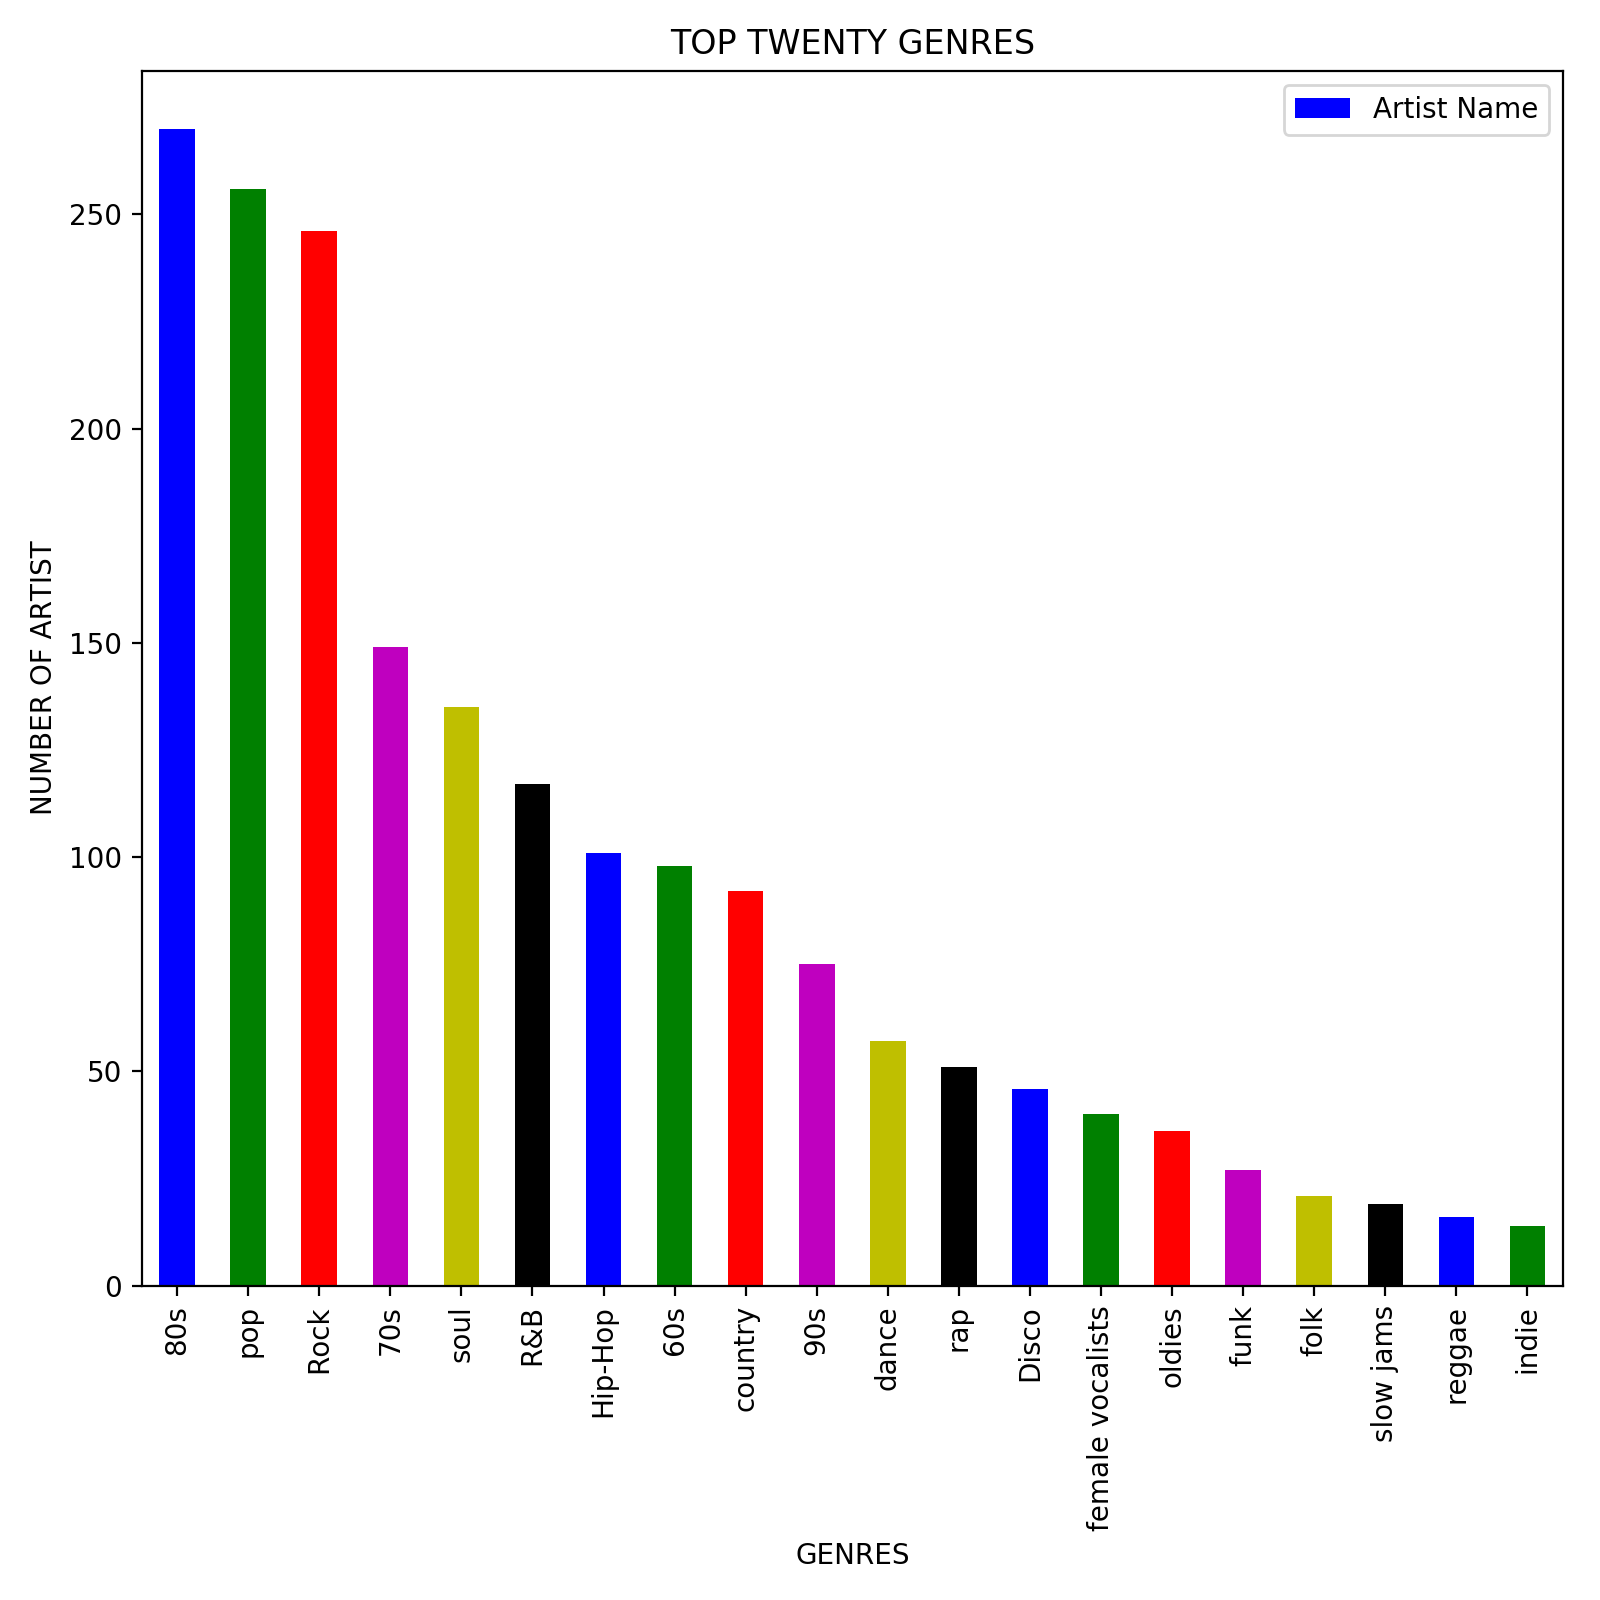

In [115]:
# Create a bar chart based on number of artist grouped by Genre
Artist_genre_count_chart = Artist_genre_count.plot(kind='bar', figsize = (8,8), color=colors)

# Set the xlabel and ylabel.
Artist_genre_count_chart.set_xlabel("GENRES")
Artist_genre_count_chart.set_ylabel("NUMBER OF ARTIST")

# Set chart Title

plt.title("TOP TWENTY GENRES")
plt.show()
plt.tight_layout()



<IPython.core.display.Javascript object>


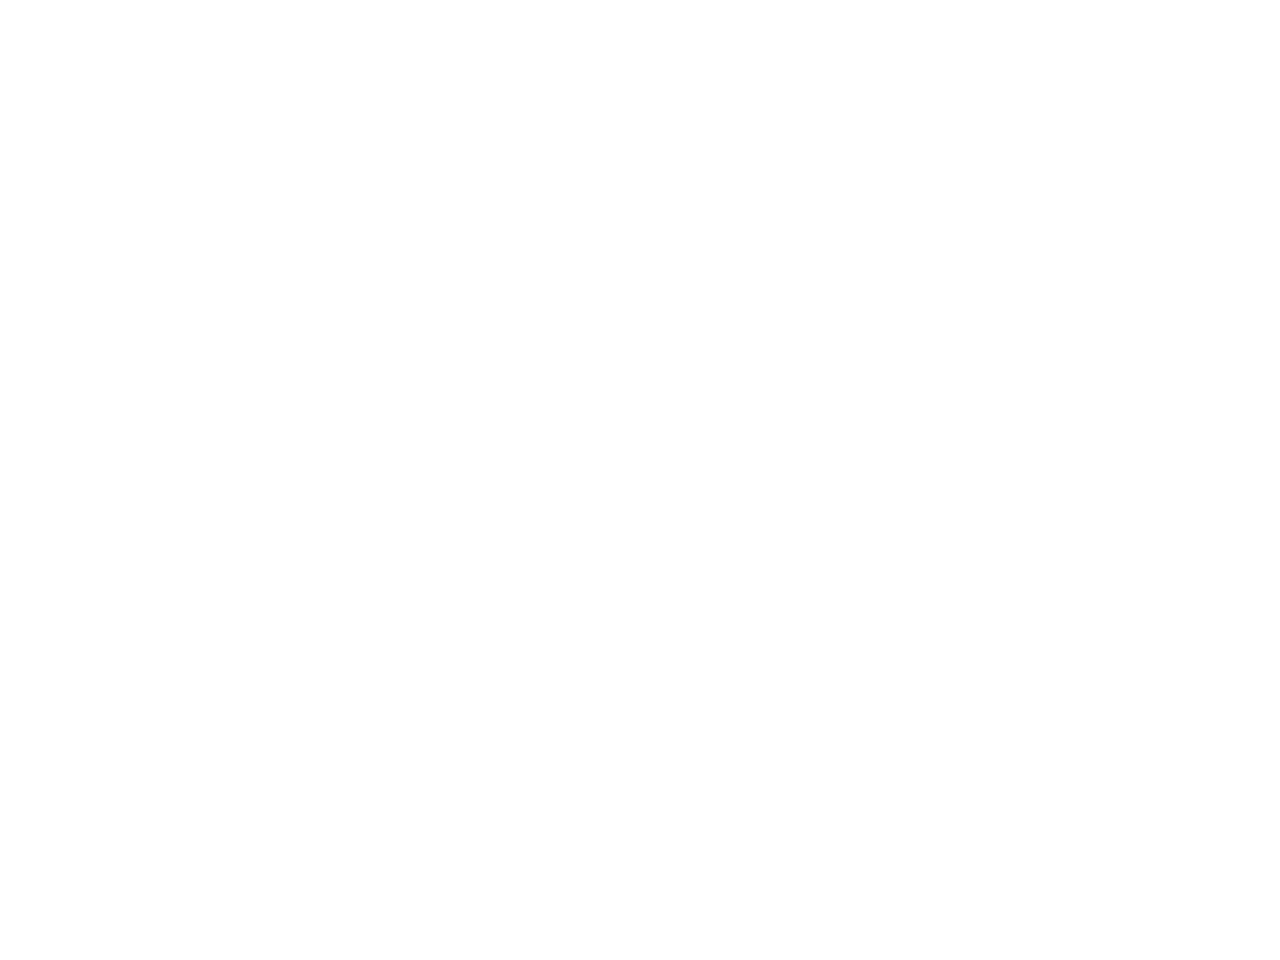

In [159]:
plt.savefig("Genre_artist.png")

                                     Artist Name
Artist Name                                     
Madonna                                       32
Rihanna                                       26
Mariah Carey                                  24
Elton John                                    24
Janet Jackson                                 22
Michael Jackson                               21
Taylor Swift                                  19
The Beatles                                   18
Stevie Wonder                                 18
Usher                                         17
Britney Spears                                16
Kelly Clarkson                                16
Katy Perry                                    16
Whitney Houston                               16
Eminem                                        15
Black Eyed Peas                               15
Maroon 5                                      14
Boyz II Men                                   13
Phil Collins        

<IPython.core.display.Javascript object>


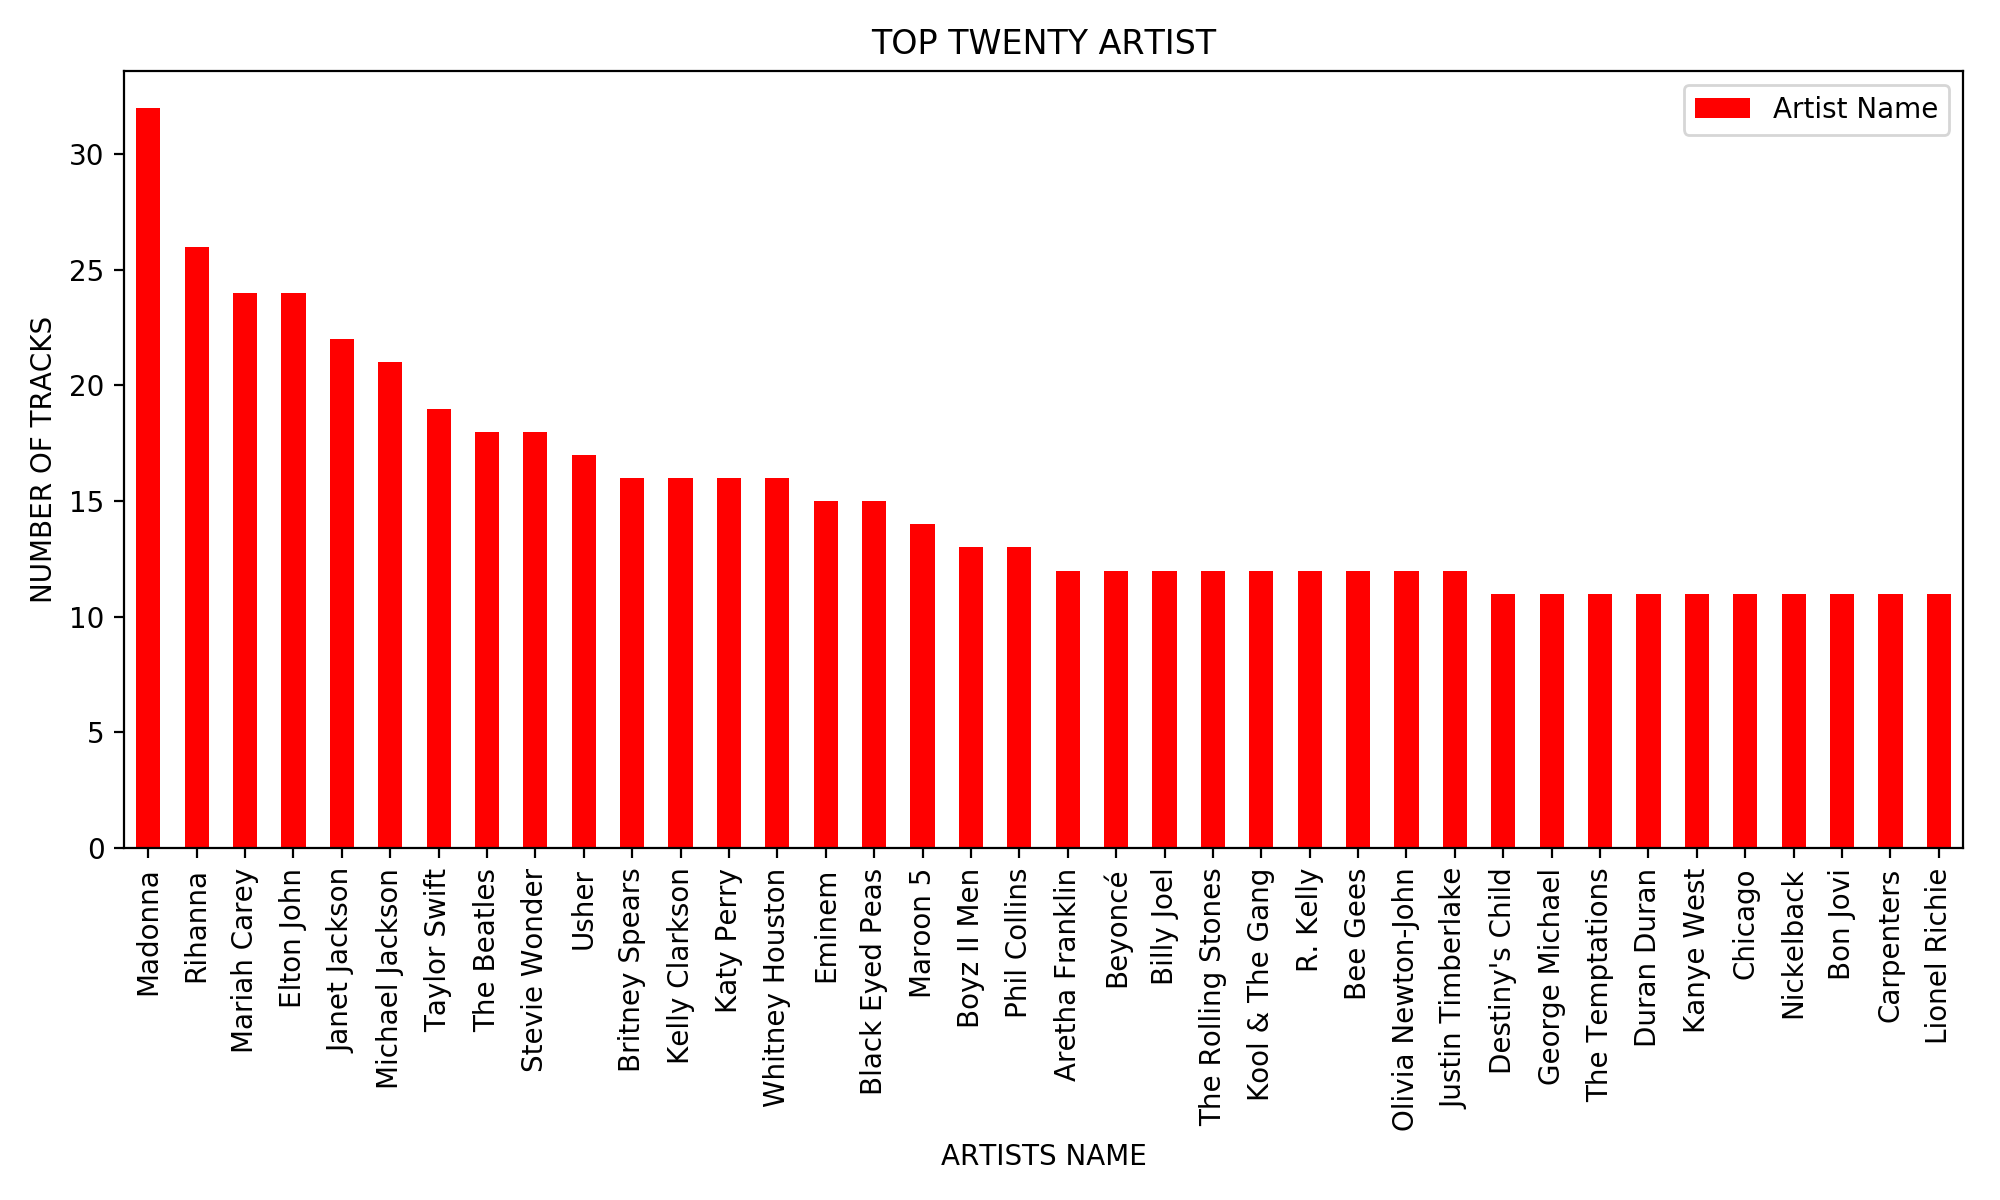

In [160]:

artist = pd.DataFrame(songfile["Artist Name"].groupby(songfile["Artist Name"]).count().sort_values(ascending = False))
print(artist)
# Create a bar chart based on number of artist based on number of top hits
artist_chart = artist.loc[artist["Artist Name"]>10].plot(kind='bar', facecolor = "r", figsize=(10,6))
# Set the xlabel and ylabel.
artist_chart.set_xlabel("ARTISTS NAME")
artist_chart.set_ylabel("NUMBER OF TRACKS")
# Set chart Title
plt.title("TOP TWENTY ARTIST")
plt.show()
plt.tight_layout()

In [161]:
plt.savefig("Top_artist.png")

In [162]:
songfile.head()

,Song,Artist Name,Year,Listeners,Genre,Playcounts,Lyrics,Play Rate
0,wooly bully,Sam The Sham & The Pharaohs,1965,112909.0,60s,373413.0,sam the sham miscellaneous wooly bully wooly b...,3.0
1,i cant help myself sugar pie honey bunch,The Four Tops,1965,52.0,60s,237.0,sugar pie honey bunch you know that i love yo...,5.0
2,you were on my mind,We Five,1965,13072.0,60s,50309.0,when i woke up this morning you were on my mi...,4.0
3,downtown,Petula Clark,1965,196939.0,60s,946427.0,when youre alone and life is making you lonel...,5.0
4,help,The Beatles,1965,906729.0,Rock,6360282.0,help i need somebody help not just anybody hel...,7.0


In [163]:
Madonna = songfile.loc[songfile["Artist Name"]== 'Madonna']
Rihanna = songfile.loc[songfile["Artist Name"]== 'Rihanna']
Mariah_Carey = songfile.loc[songfile["Artist Name"]== 'Mariah Carey']
Elton_John = songfile.loc[songfile["Artist Name"]== 'Elton John']
Janet_Jackson = songfile.loc[songfile["Artist Name"]== 'Janet Jackson']
Michael_Jackson = songfile.loc[songfile["Artist Name"]== 'Michael Jackson']
Madonna.head()

,Song,Artist Name,Year,Listeners,Genre,Playcounts,Lyrics,Play Rate
1509,borderline,Madonna,1984,218852.0,80s,1114655.0,something in the way you love me wont let me ...,5.0
1536,lucky star,Madonna,1984,236422.0,pop,1185596.0,you must be my lucky star cause you shine on ...,5.0
1547,holiday,Madonna,1984,326904.0,pop,1586155.0,holiday celebrate holiday celebrateif we took...,5.0
1567,like a virgin,Madonna,1985,506256.0,pop,2559831.0,i made it through the wilderness somehow i ma...,5.0
1574,crazy for you,Madonna,1985,197731.0,pop,1037601.0,swaying room as the music starts strangers ma...,5.0


In [164]:
Madonna_G = Madonna["Genre"].value_counts().sort_values(ascending = False)
Rihanna_G = Rihanna["Genre"].value_counts().sort_values(ascending = False)
Mariah_G = Mariah_Carey["Genre"].value_counts().sort_values(ascending = False)
Elton_G = Elton_John["Genre"].value_counts().sort_values(ascending = False)
Janet_G = Janet_Jackson["Genre"].value_counts().sort_values(ascending = False)
Michael_G = Michael_Jackson["Genre"].value_counts().sort_values(ascending = False)
Michael_G

pop           20
electronic     1
Name: Genre, dtype: int64

In [165]:
Top_Artist = {"Madonna":Madonna_G,"Rihanna":Rihanna_G,"Mariah":Mariah_G,"Elton":Elton_G,"Janet":Janet_G,"Michael":Michael_G }

In [166]:
Top_Artist = pd.DataFrame(Top_Artist)
Top_Artist = Top_Artist.fillna(0)
Top = Top_Artist.T
Top

,70s,80s,90s,Awesome,Hip-Hop,Mariah Carey,R&B,Rihanna,Rock,Soundtrack,dance,electronic,favorites,my soundtrack,party,piano,pop,slow jam old
Madonna,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0
Rihanna,0.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,15.0,0.0
Mariah,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
Elton,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,10.0,0.0
Janet,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0
Michael,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0,0.0


<IPython.core.display.Javascript object>


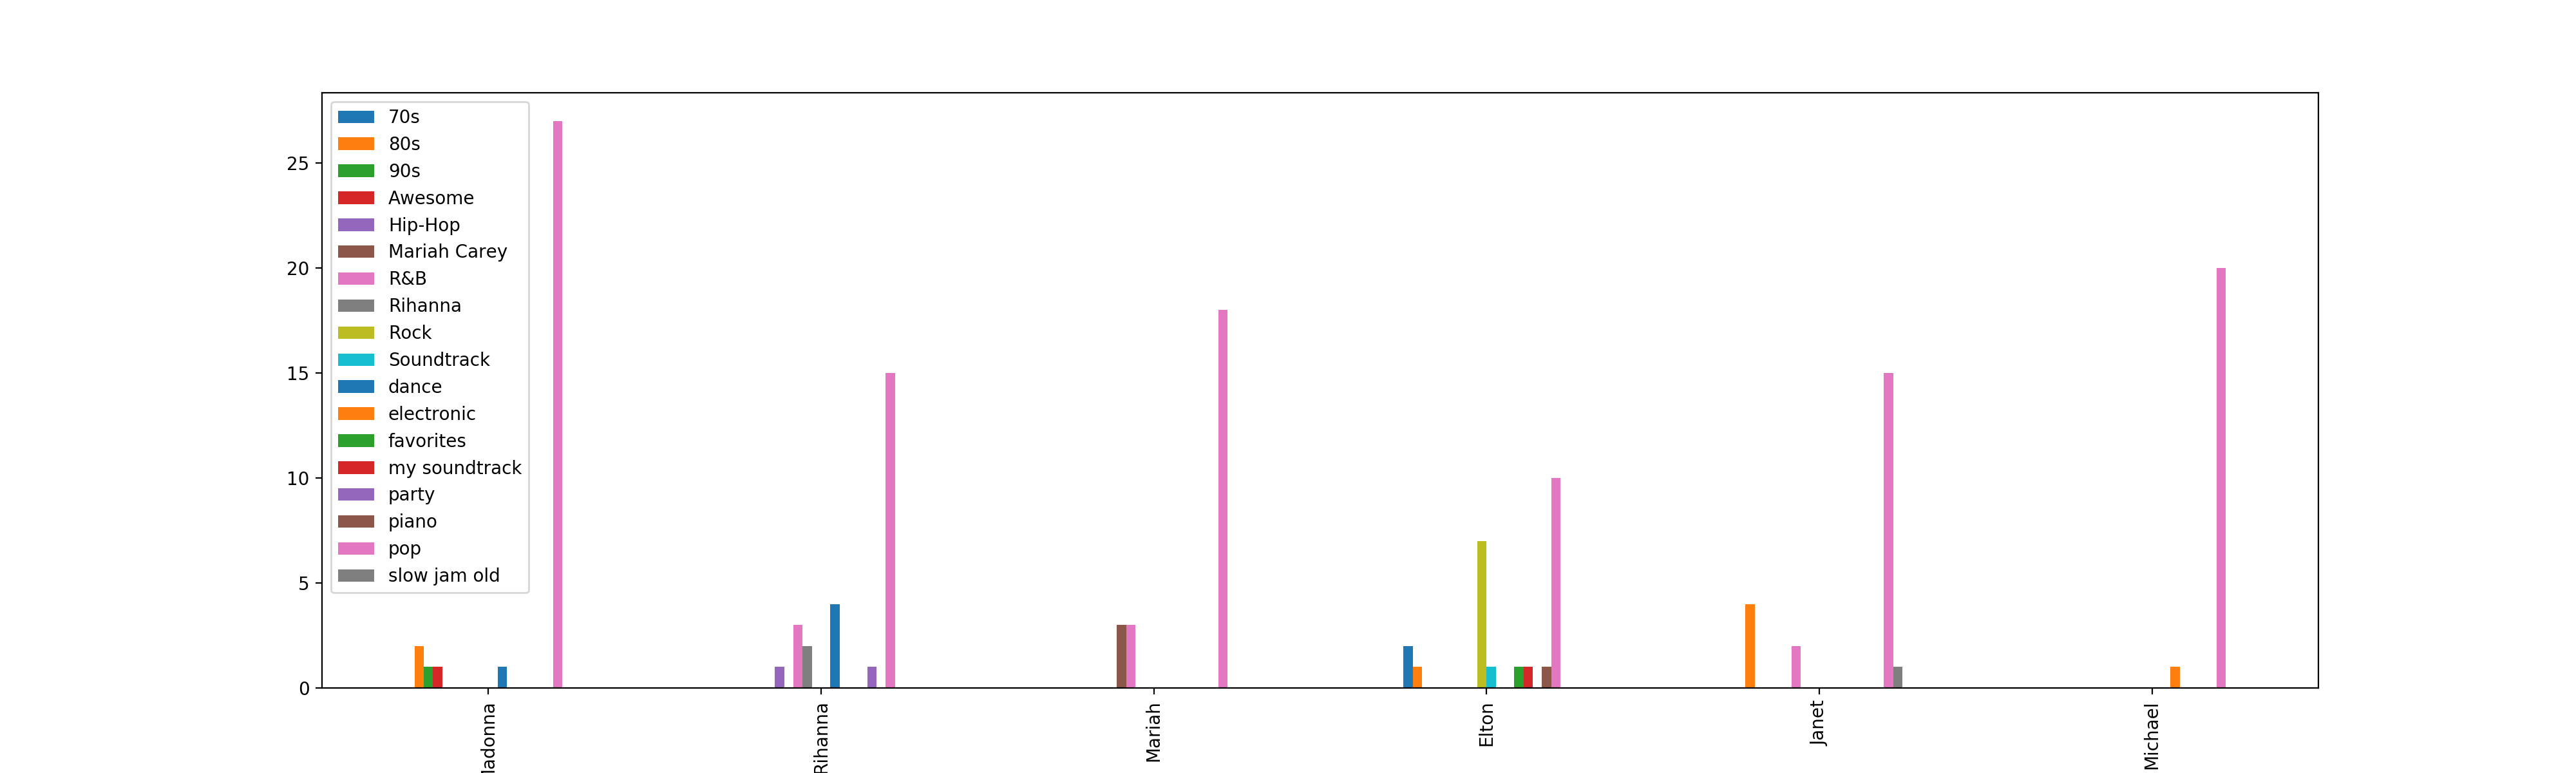

In [129]:
Top_Artist_chart = Top.plot(kind='bar', figsize=(20,6))

In [116]:
grouped_GL = pd.DataFrame(cleaned.groupby(["Genre"]).mean()["Listeners"].sort_values(ascending = False))

grouped_GP = pd.DataFrame(cleaned.groupby(["Genre"]).mean()["Playcounts"].sort_values(ascending = False))


<IPython.core.display.Javascript object>


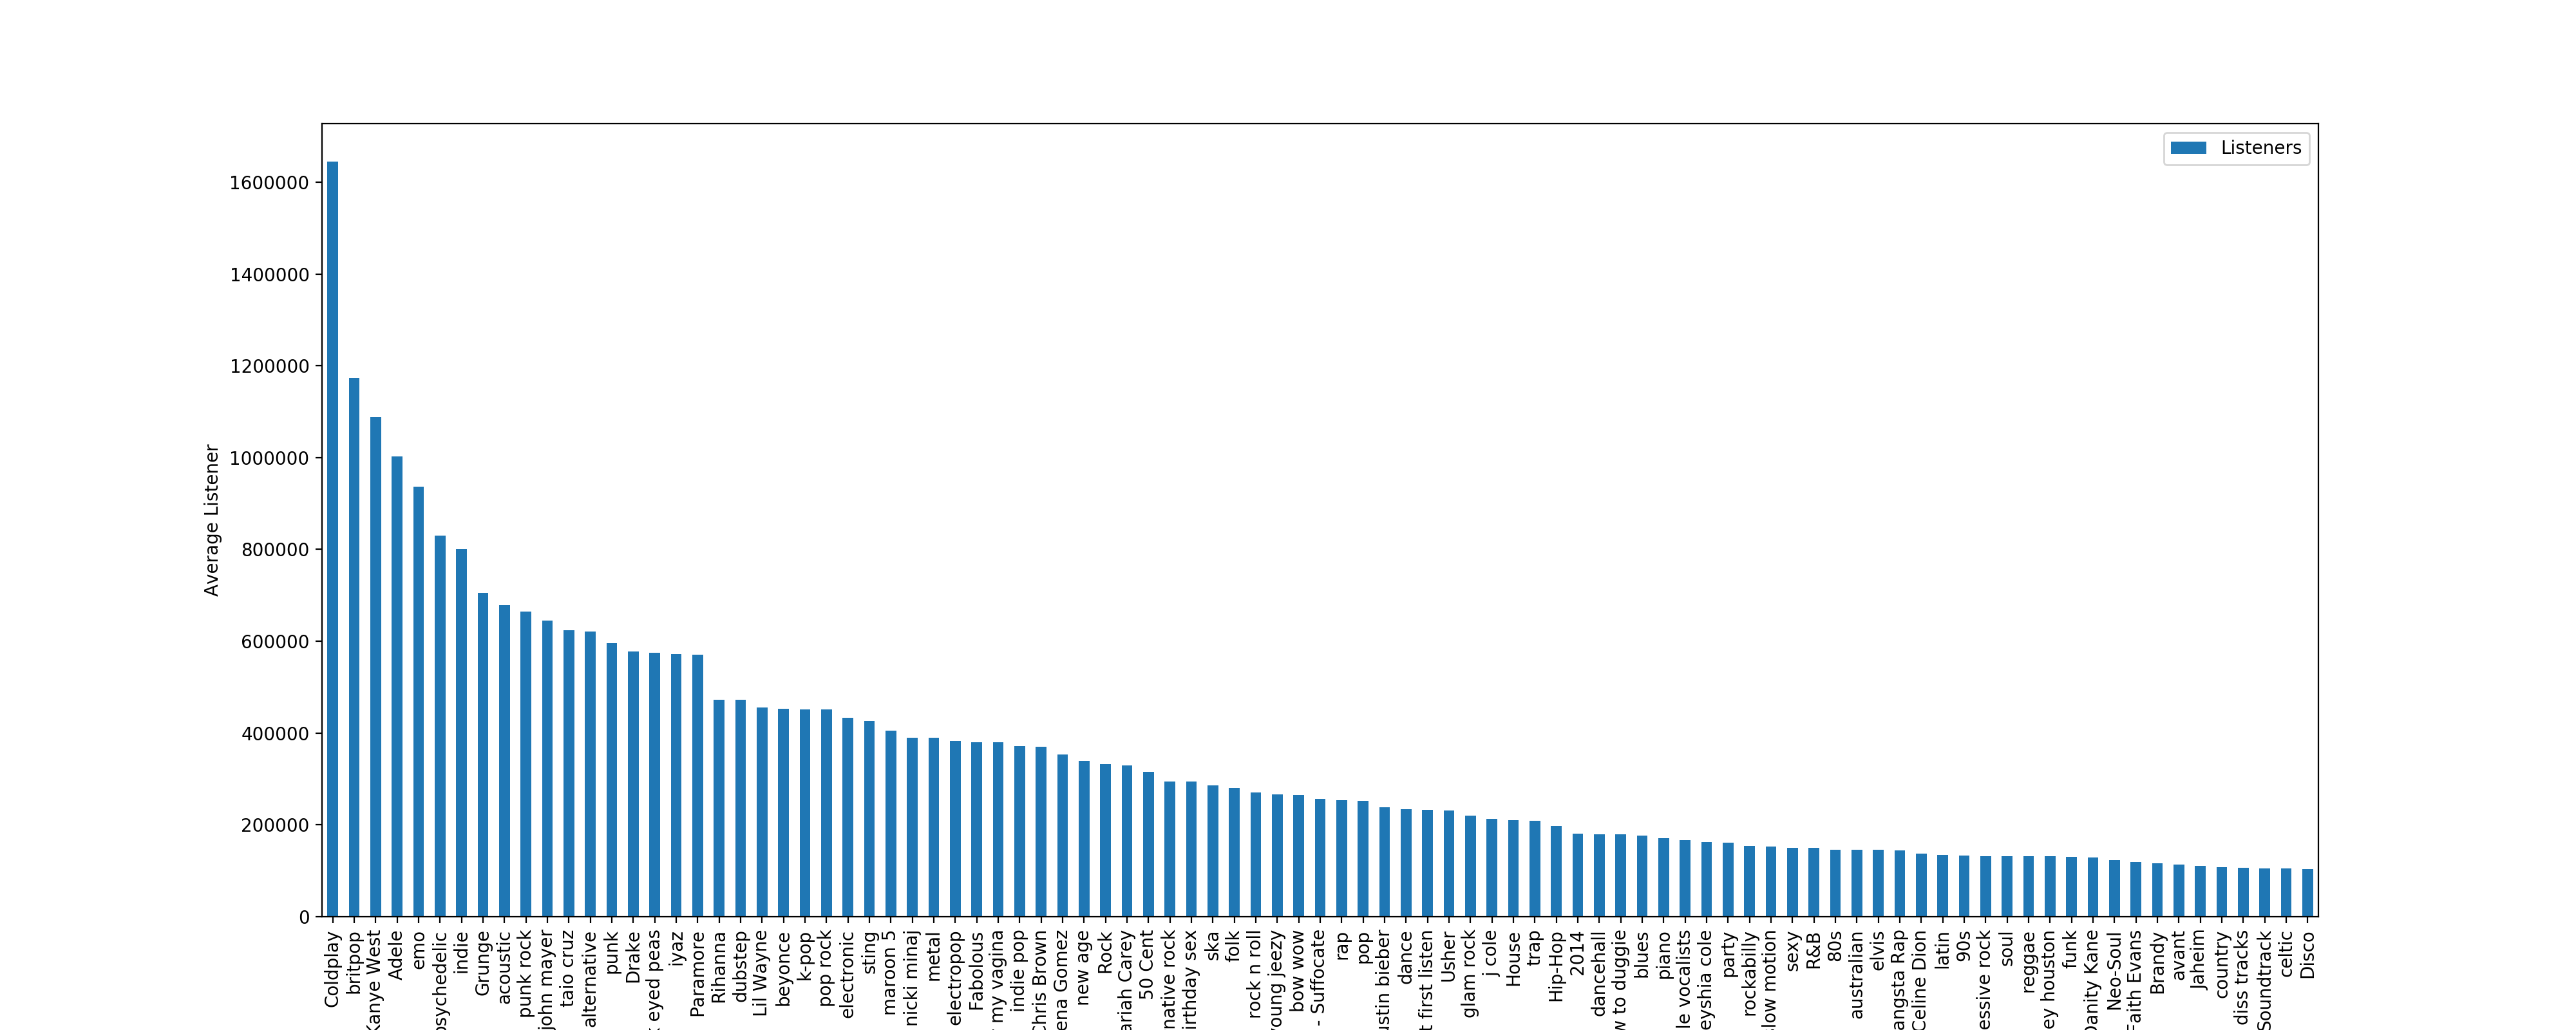

<IPython.core.display.Javascript object>


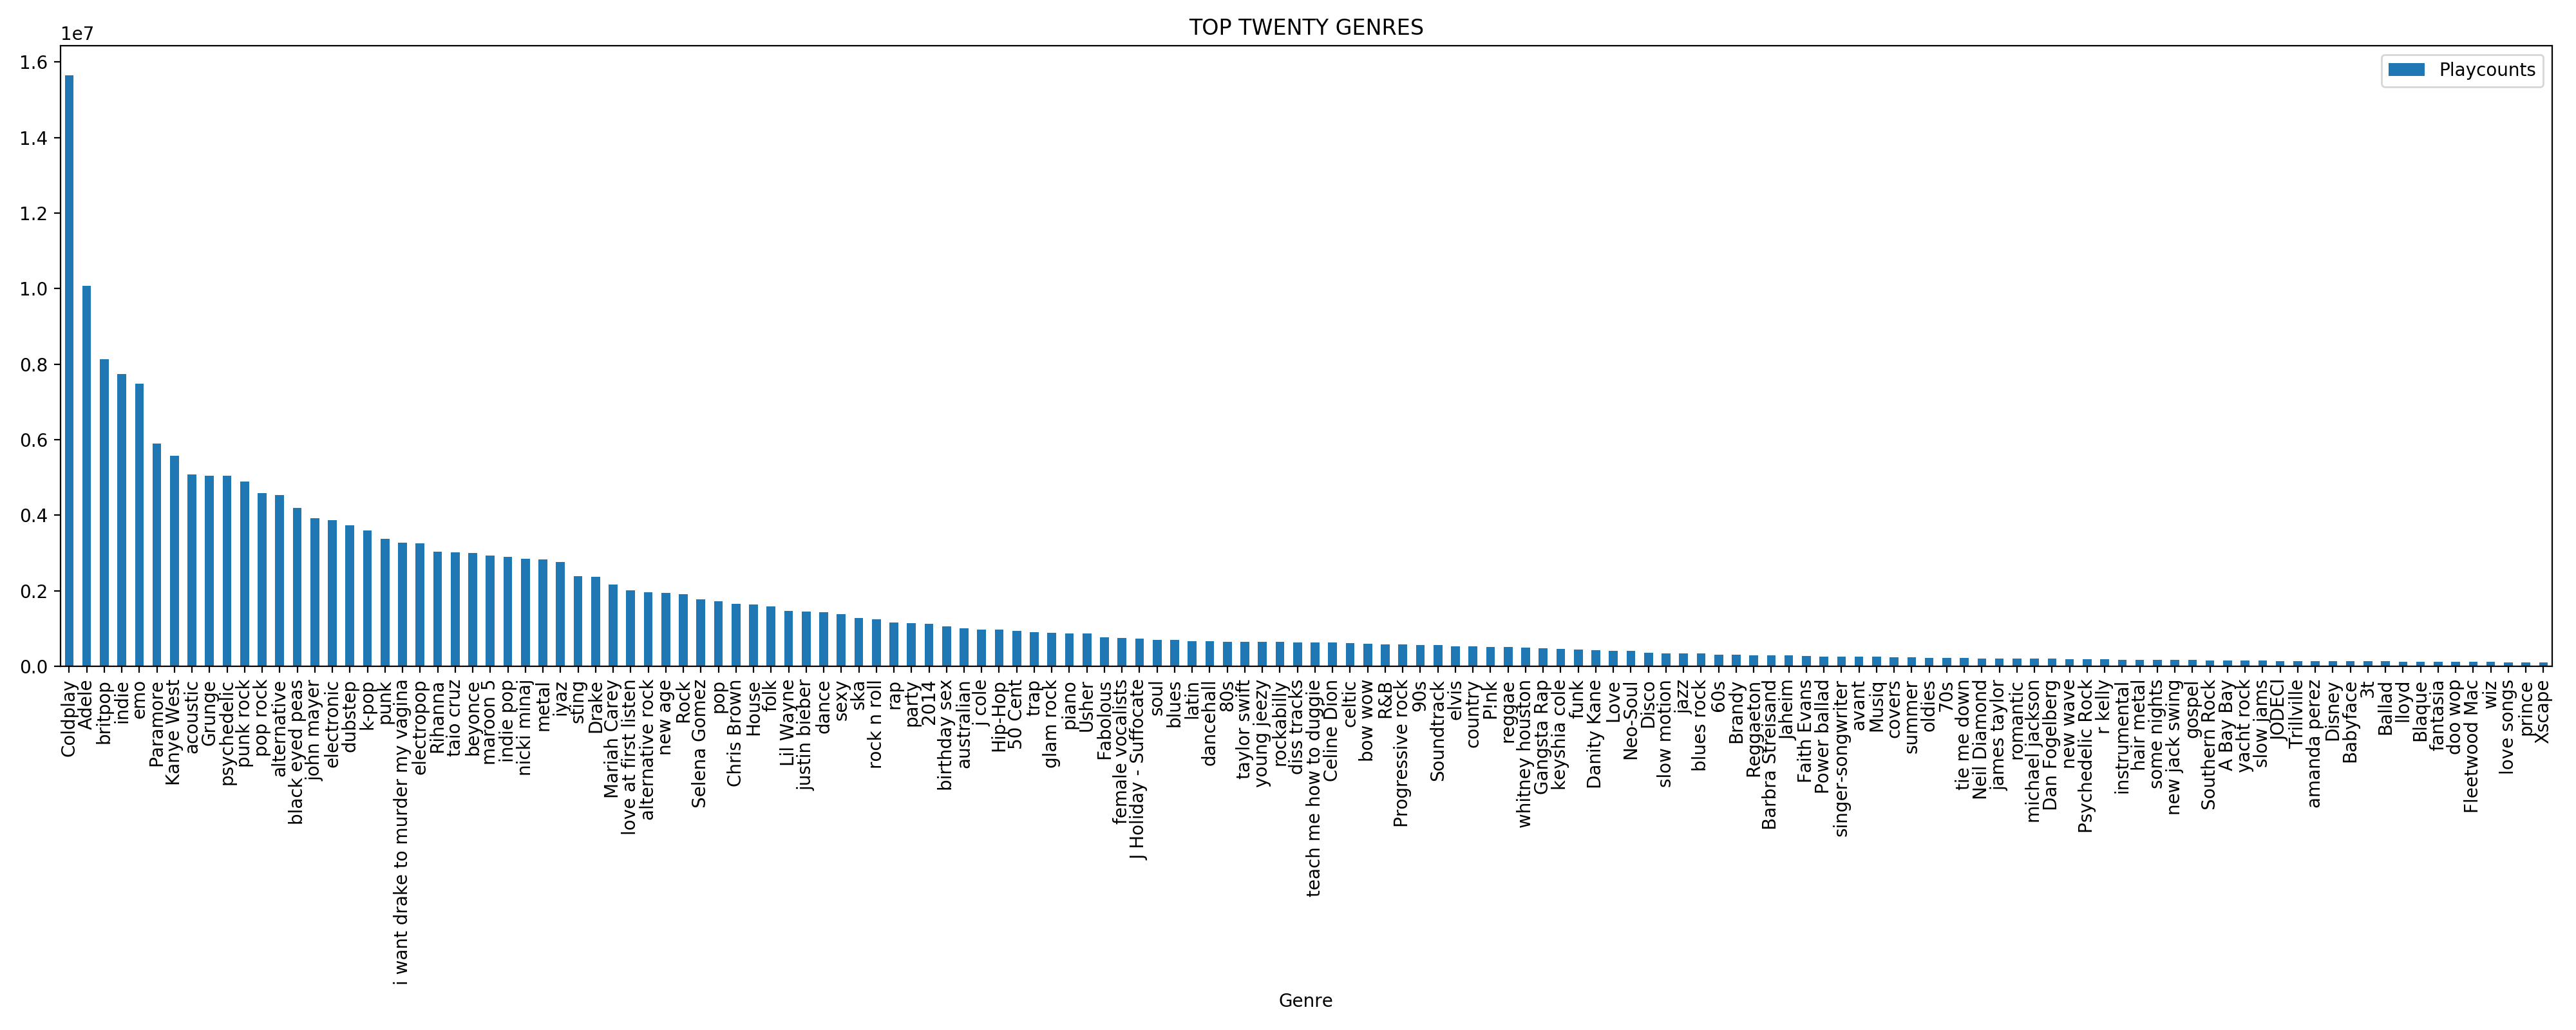

In [105]:

grouped_GL_chart = grouped_GL.loc[grouped_GL["Listeners"]>100000].plot(kind='bar', figsize = (20,8))
grouped_GP_chart = grouped_GP.loc[grouped_GP["Playcounts"]>100000].plot(kind='bar', figsize = (20,8))
# Set the xlabel and ylabel.
grouped_GL_chart.set_xlabel("GENRES")
grouped_GL_chart.set_ylabel("Average Listener")

# Set chart Title

plt.title("TOP TWENTY GENRES")
plt.show()
plt.tight_layout()